In [2]:
weather=['Sunny','Sunny','Overcast','Rainy','Rainy','Rainy','Overcast','Sunny','Sunny',
'Rainy','Sunny','Overcast','Overcast','Rainy']
temp=['Hot','Hot','Hot','Mild','Cool','Cool','Cool','Mild','Cool','Mild','Mild','Mild','Hot','Mild']

play=['No','No','Yes','Yes','Yes','No','Yes','No','Yes','Yes','Yes','Yes','Yes','No']

In [3]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
weather_new=le.fit_transform(weather)
weather_new #sunny-2,overcast-0,rainy-1(strings are converted into numbers so label encoder is used)


array([2, 2, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1])

In [4]:
temp_new=le.fit_transform(temp)
print(temp_new) #hot-1,mild-2,cool-0

[1 1 1 2 0 0 0 2 0 2 2 2 1 2]


In [5]:
features=zip(weather_new,temp_new)
features=list(features)
features

[(2, 1),
 (2, 1),
 (0, 1),
 (1, 2),
 (1, 0),
 (1, 0),
 (0, 0),
 (2, 2),
 (2, 0),
 (1, 2),
 (2, 2),
 (0, 2),
 (0, 1),
 (1, 2)]

In [6]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(features,play)
predict=nb.predict([[0,2]])
print(predict)

['Yes']


In [7]:
import pandas as pd
df=pd.read_csv('/content/IRIS.csv')
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [8]:
X=df.iloc[0:,:-1]
X


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [10]:
y=df.iloc[0:,-1]
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: species, Length: 150, dtype: object

In [14]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)
X_train

,sepal_length,sepal_width,petal_length,petal_width
118,7.7,2.6,6.9,2.3
18,5.7,3.8,1.7,0.3
4,5.0,3.6,1.4,0.2
45,4.8,3.0,1.4,0.3
59,5.2,2.7,3.9,1.4
...,...,...,...,...
133,6.3,2.8,5.1,1.5
137,6.4,3.1,5.5,1.8
72,6.3,2.5,4.9,1.5
140,6.7,3.1,5.6,2.4


In [15]:
X_test.shape


(45, 4)

In [16]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
X_train_new=sc.transform(X_train)
print(X_train_new)

[[ 2.26050169 -1.04854298  1.77691682  1.4226136 ]
 [-0.11897377  1.8551145  -1.14624252 -1.13955497]
 [-0.95179019  1.37117159 -1.31488633 -1.2676634 ]
 [-1.18973773 -0.08065715 -1.31488633 -1.13955497]
 [-0.71384264 -0.80657152  0.09047874  0.26963774]
 [-0.83281641  0.88722867 -1.25867172 -1.2676634 ]
 [-0.35692132  1.12920013 -1.37110093 -1.2676634 ]
 [ 2.26050169  1.8551145   1.66448762  1.29450517]
 [ 1.3087115   0.1613143   0.93369778  1.16639674]
 [ 1.7846066  -0.32262861  1.43962921  0.78207145]
 [ 0.71384264 -0.56460007  1.04612699  1.29450517]
 [ 0.47589509 -0.56460007  0.59641017  0.78207145]
 [ 0.23794755  0.88722867  0.42776636  0.5258546 ]
 [ 2.26050169 -0.56460007  1.66448762  1.03828831]
 [-0.11897377 -0.08065715  0.25912255  0.01342088]
 [-1.18973773  0.88722867 -1.20245712 -1.2676634 ]
 [-0.11897377 -1.29051444  0.70883937  1.03828831]
 [ 0.59486887 -0.80657152  0.65262477  0.78207145]
 [-1.18973773 -0.08065715 -1.31488633 -1.39577183]
 [-1.3087115   0.40328576 -1.37

In [17]:
X_test_new=sc.transform(X_test)
X_test_new

array([[ 0.        ,  2.33905742, -1.42731553, -1.2676634 ],
       [-0.83281641, -1.29051444, -0.41545268, -0.11468755],
       [ 0.95179019, -0.08065715,  0.37155176,  0.26963774],
       [-0.47589509,  2.09708596, -1.37110093, -1.01144654],
       [ 2.49844924,  1.8551145 ,  1.49584381,  1.03828831],
       [ 0.59486887,  0.64525722,  0.54019556,  0.5258546 ],
       [ 1.3087115 ,  0.1613143 ,  0.76505397,  1.4226136 ],
       [-0.83281641,  1.8551145 , -1.03381331, -1.01144654],
       [-1.3087115 ,  0.40328576, -1.20245712, -1.2676634 ],
       [ 1.3087115 ,  0.40328576,  1.10234159,  1.4226136 ],
       [-0.23794755, -0.80657152,  0.25912255,  0.14152931],
       [-0.47589509,  2.09708596, -1.14624252, -1.01144654],
       [ 1.54665905, -0.08065715,  1.2147708 ,  1.16639674],
       [ 0.71384264,  0.40328576,  0.42776636,  0.39774617],
       [ 0.23794755, -0.32262861,  0.42776636,  0.39774617],
       [-1.66563282,  0.40328576, -1.37110093, -1.2676634 ],
       [ 0.        , -1.

In [18]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(X_train_new,y_train)
y_pred=nb.predict(X_test_new)
print(y_pred)

['Iris-setosa' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-setosa' 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica' 'Iris-setosa'
 'Iris-virginica' 'Iris-versicolor' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-setosa'
 'Iris-versicolor' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-virginica' 'Iris-setosa' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor']


In [19]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_pred)*100)


93.33333333333333


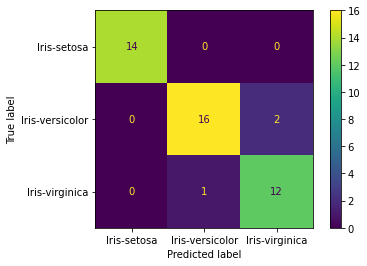

In [20]:
from sklearn.metrics import ConfusionMatrixDisplay
print(ConfusionMatrixDisplay.from_predictions(y_test,y_pred))


In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        14
Iris-versicolor       0.94      0.89      0.91        18
 Iris-virginica       0.86      0.92      0.89        13

       accuracy                           0.93        45
      macro avg       0.93      0.94      0.93        45
   weighted avg       0.94      0.93      0.93        45

